<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Stock_Market_Analysis_%26_Prediction_Project_%7C_Apple_(AAPL)_and_Tesla_(TSLA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📊 Stock Market Analysis & Prediction Project | Apple (AAPL) and Tesla (TSLA) 📈**

**Welcome to the Stock Market Analysis & Prediction Project using Python!**

In this notebook, we will analyze the stock market performance of Apple (AAPL) and Tesla (TSLA). Using Python libraries like yfinance, pandas, matplotlib, and seaborn, we’ll fetch historical stock data, analyze trends, and visualize key metrics. Additionally, we’ll implement machine learning models to predict future stock prices, offering valuable insights for data-driven decision-making.

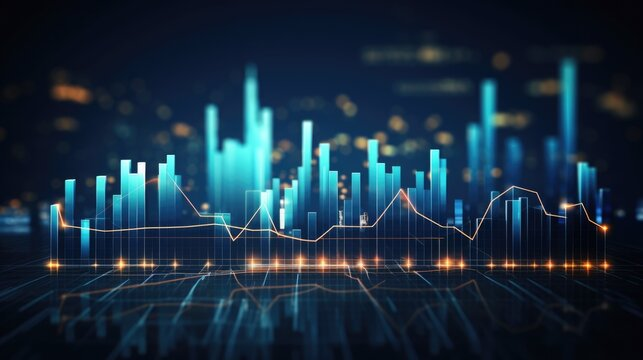

In [ ]:
# !pip install pandas scikit-learn matplotlib yfinance


[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 307.6186918926184


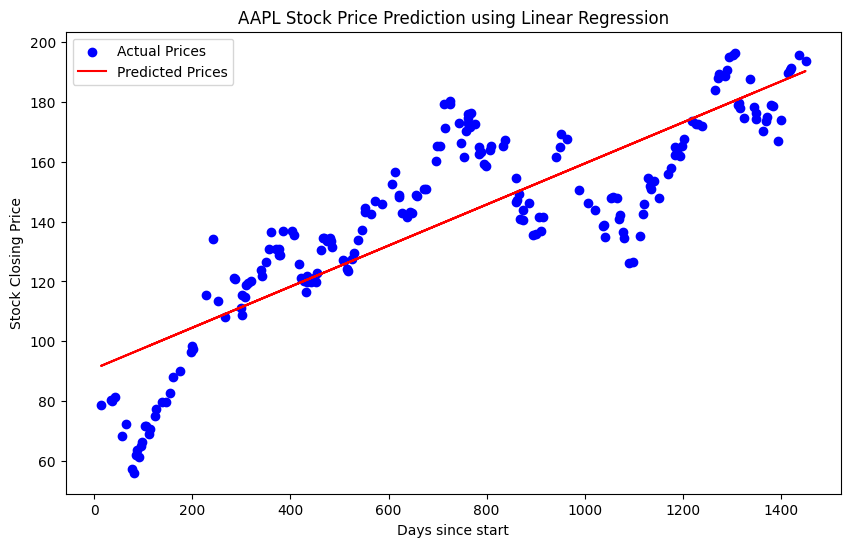

In [ ]:
# Import necessary libraries
#https://uk.finance.yahoo.com/quote/AAPL/

# prompt: analyse the apple stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load historical stock data using yfinance (e.g., Apple Inc. AAPL stock)
ticker = 'AAPL'  # You can replace this with any other stock ticker symbol
stock_data = yf.download(ticker, start='2020-01-01', end='2023-12-31')
# stock_data.head()

# Preprocessing the data
# Resetting the index to have 'Date' as a column
stock_data.reset_index(inplace=True)

# Using 'Date' as a feature (number of days since the start)
stock_data['Days'] = (stock_data['Date'] - stock_data['Date'].min()).dt.days

# Define features (X) and target (y)
X = stock_data[['Days']]  # Days since the first data point
y = stock_data['Close']   # Closing stock prices

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict stock prices for the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Days since start')
plt.ylabel('Stock Closing Price')
plt.title(f'{ticker} Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()


# **Second Example**

[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 5233.589434966565


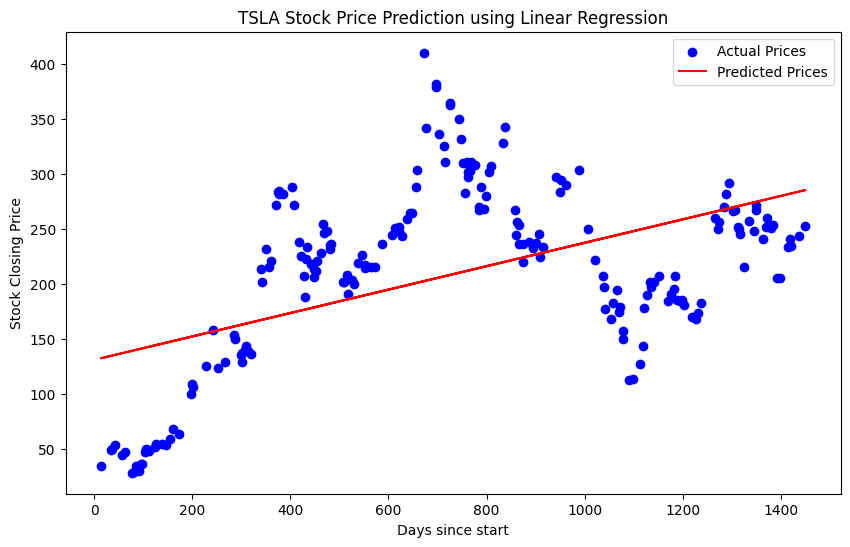

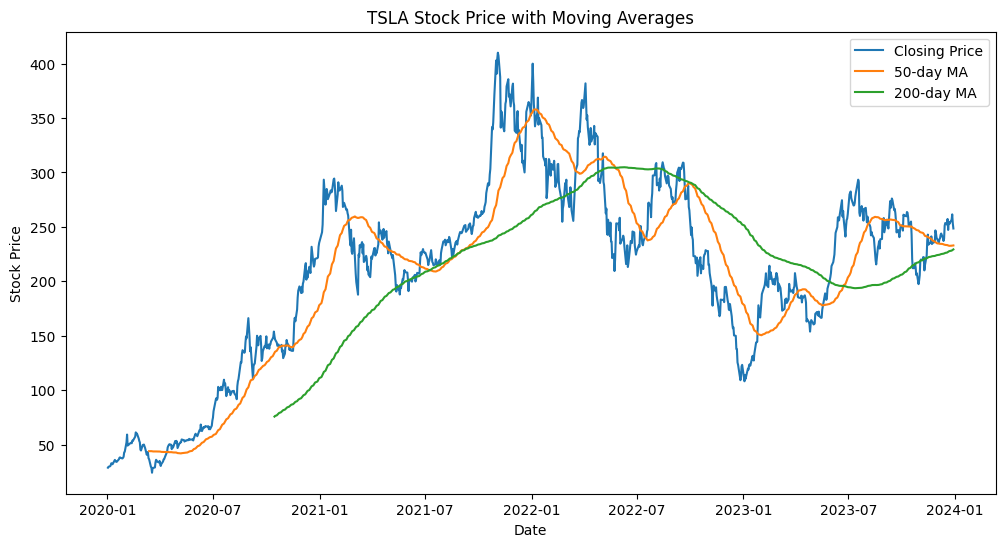

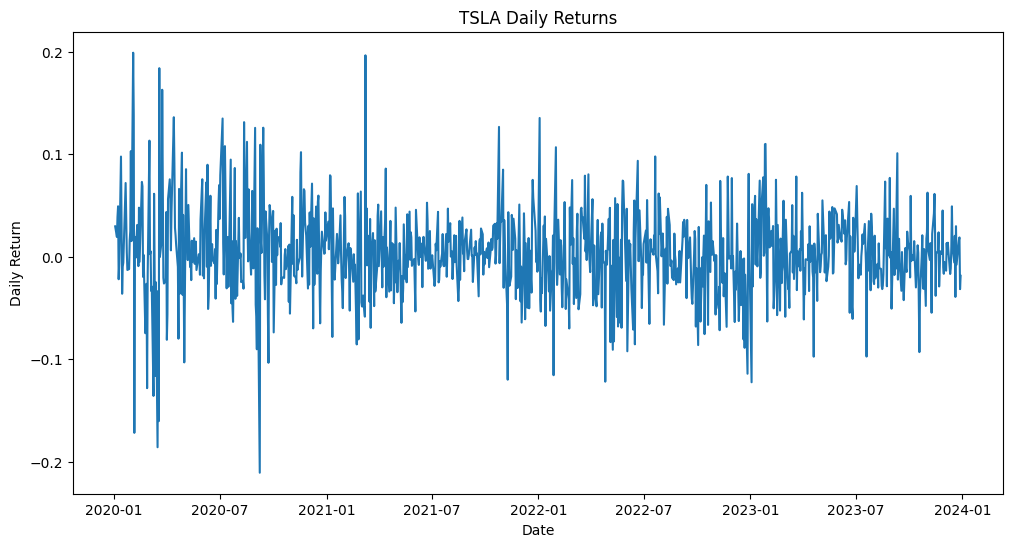

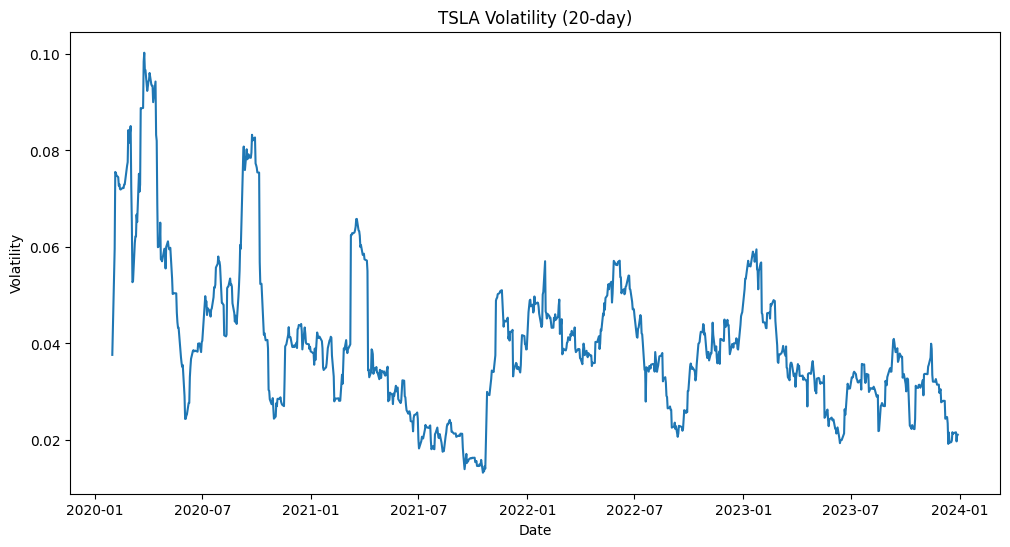

In [ ]:
# prompt: analyse the tesla stock
#https://uk.finance.yahoo.com/quote/TSLA/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load historical stock data for Tesla (TSLA)
ticker = 'TSLA'  # Tesla's stock ticker symbol
stock_data = yf.download(ticker, start='2020-01-01', end='2023-12-31')

# Preprocessing the data
stock_data.reset_index(inplace=True)
stock_data['Days'] = (stock_data['Date'] - stock_data['Date'].min()).dt.days

# Define features (X) and target (y)
X = stock_data[['Days']]
y = stock_data['Close']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict stock prices for the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Days since start')
plt.ylabel('Stock Closing Price')
plt.title(f'{ticker} Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()

# Calculate moving averages (e.g., 50-day and 200-day)
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
plt.plot(stock_data['Date'], stock_data['MA50'], label='50-day MA')
plt.plot(stock_data['Date'], stock_data['MA200'], label='200-day MA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price with Moving Averages')
plt.legend()
plt.show()

# Calculate daily returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Daily Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title(f'{ticker} Daily Returns')
plt.show()

# Calculate volatility (e.g., standard deviation of daily returns over a period)
volatility_window = 20  # Example: 20-day volatility
stock_data['Volatility'] = stock_data['Daily Return'].rolling(window=volatility_window).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title(f'{ticker} Volatility (20-day)')
plt.show()